<a href="https://colab.research.google.com/github/Jarmos-san/Skin-Cancer-MNIST/blob/master/Skin_Cancer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Skin Cancer MNIST: HAM10000](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000)

### **Author's Note**:

Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: 

|                             Type                                |  Abbv |
|-----------------------------------------------------------------|-------|
| Actinic keratoses and intraepithelial carcinoma/Bowen's Disease | akiec |
| basal cell carcinoma                                            | bcc   |
| benign keratosis-like lesions                                   | bkl   |
| dermatofibroma                                                  | df    |
| melanoma                                                        | mel   |
| melanocytic nevi                                                | nv    |
| vascular lesions                                                | vasc  |

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (followup), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesionid-column within the HAM10000_metadata file.

The test set is not public, but the evaluation server remains running (see the challenge website). Any publications written using the HAM10000 data should be evaluated on the official test set hosted there, so that methods can be fairly compared.

### _**Resources**_:

1. [Dermatology Image Classification](https://www.kaggle.com/yuningalexliu/dermatology-image-classification)

# Notebook Setup

In [0]:
# Upload the downloaded kaggle.json file
from google.colab import files
import time

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

In [0]:
# Copy the kaggle.json file to the suggested dir
!mv /content/kaggle.json /root/.kaggle/kaggle.json

# Secure access to the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json

# Remove unecessary dir & files
!rm -rf /content/sample_data

# Check if the Kaggle CLI works fine or not
!kaggle --version

Kaggle API 1.5.4


In [0]:
# Download the zipped file from Kaggle
!kaggle datasets download kmader/skin-cancer-mnist-ham10000

# Unzip downloaded folder to /content dir
!unzip /content/skin-cancer-mnist-ham10000.zip

# remove downloaded zipped folder
!rm /content/skin-cancer-mnist-ham10000.zip

In [0]:
!ls -la -a /content/HAM10000_images_part_1

# Import Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from IPython.display import Image, display

In [0]:
print(f'Numpy v{np.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'TensorFlow v{tf.__version__}')

Numpy v1.18.2
Pandas v1.0.3
TensorFlow v2.2.0-rc2


# Overview

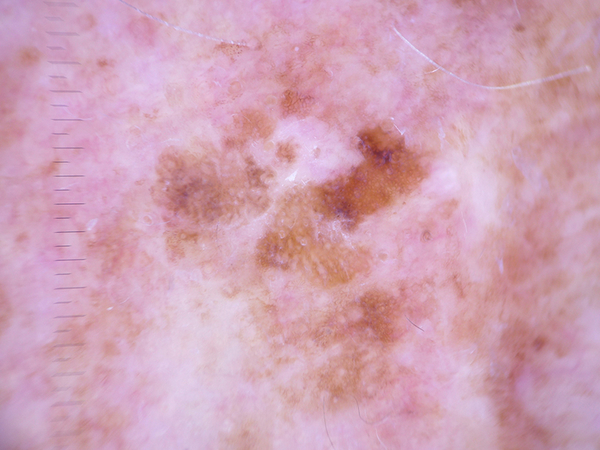

In [0]:
Image('/content/HAM10000_images_part_1/ISIC_0027419.jpg')

It appears there're 4 Image folders each with identical pairs of images without any visual differences. So accordingly, I'll go ahead working with only one single dataset for now with 5000 images.

In [0]:
!ls -l /content

total 130852
drwxr-xr-x 2 root root   180224 Apr  9 11:03 ham10000_images_part_1
drwxr-xr-x 2 root root   180224 Apr  9 11:02 HAM10000_images_part_1
drwxr-xr-x 2 root root   180224 Apr  9 11:03 ham10000_images_part_2
drwxr-xr-x 2 root root   180224 Apr  9 11:02 HAM10000_images_part_2
-rw-r--r-- 1 root root   563277 Oct  6  2019 HAM10000_metadata.csv
-rw-r--r-- 1 root root 30807979 Oct  6  2019 hmnist_28_28_L.csv
-rw-r--r-- 1 root root 91820383 Oct  6  2019 hmnist_28_28_RGB.csv
-rw-r--r-- 1 root root  2537778 Oct  6  2019 hmnist_8_8_L.csv
-rw-r--r-- 1 root root  7524968 Oct  6  2019 hmnist_8_8_RGB.csv


In [0]:
ROOT = '/content'
PATH = '/content/HAM10000_images_part_1'

In [0]:
len(os.listdir(PATH))

5000

In [0]:
METADATA_FILE = 'HAM10000_metadata.csv'

metadata = pd.read_csv(os.path.join(ROOT, METADATA_FILE)).copy()

In [0]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [0]:
classnames = {
    'aklec': 'Actinic keratoses',
    'bcc': 'basal cell carcinoma',
    'bkl': 'benign keratosis-like lesions',
    'df': 'dermatofibroma',
    'mel': 'melanoma',
    'nv': 'melanocytic nevi',
    'vasc': 'vascular lesions'
}

In [0]:
path_dict = {os.path.splitext(os.path.basename(x))[0]:
             x for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

NameError: ignored

In [0]:
metadata['path'] = metadata['path']
metadata.head()

KeyError: ignored